<a href="https://colab.research.google.com/github/SushmitaSamaddar5/Stock_Market_Analysis/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To extract the data of stock we use yfinance to extract current stock data.

pip install yfinance


In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037
2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734
2004-09-02,2.470490,2.549693,2.464263,2.528273,2.525399,303810504
2004-09-03,2.514326,2.534002,2.473728,2.490913,2.488082,103538639
2004-09-07,2.515820,2.540478,2.480951,2.530017,2.527141,117506800


In [ ]:
google_data.shape

(5035, 6)

In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,45.869576,46.354379,45.412219,45.892200,45.842332,1.149760e+08
std,43.997736,44.486191,43.568983,44.033838,43.990569,1.491617e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.078229,13.187819,12.926424,13.081592,13.066723,2.716845e+07
50%,27.093117,27.373844,26.921087,27.119045,27.088221,5.449950e+07
75%,60.795500,61.310452,60.245499,60.825500,60.756361,1.415506e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-08-31 to 2024-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [ ]:
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of google data')

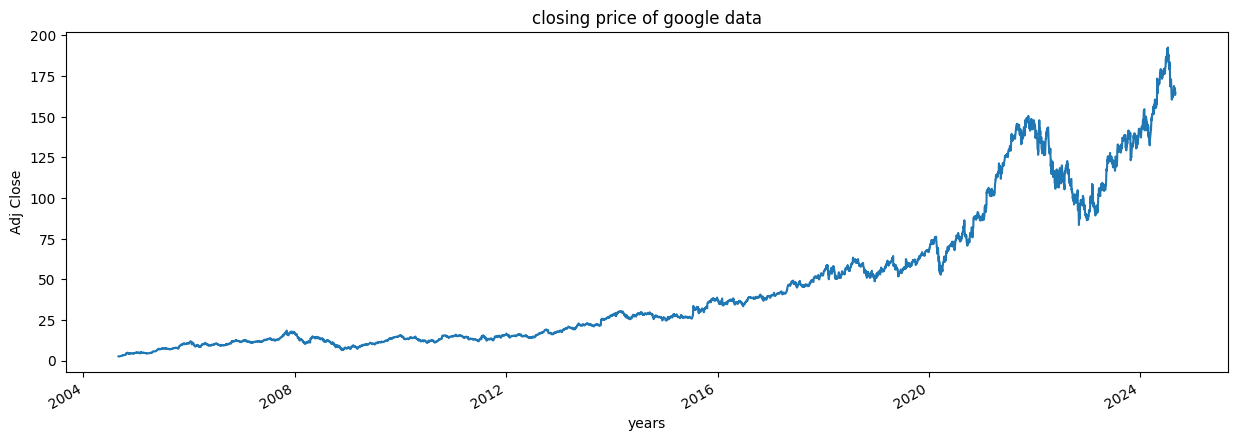

In [ ]:
plt.figure(figsize= (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("closing price of google data")

we are creating a function to plot all seperate graphs for the google_data

In [ ]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel("Years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google Data")

Extracting all the column names from googe_data

In [ ]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Using a for loop to plot all the graphs for the google_data columns

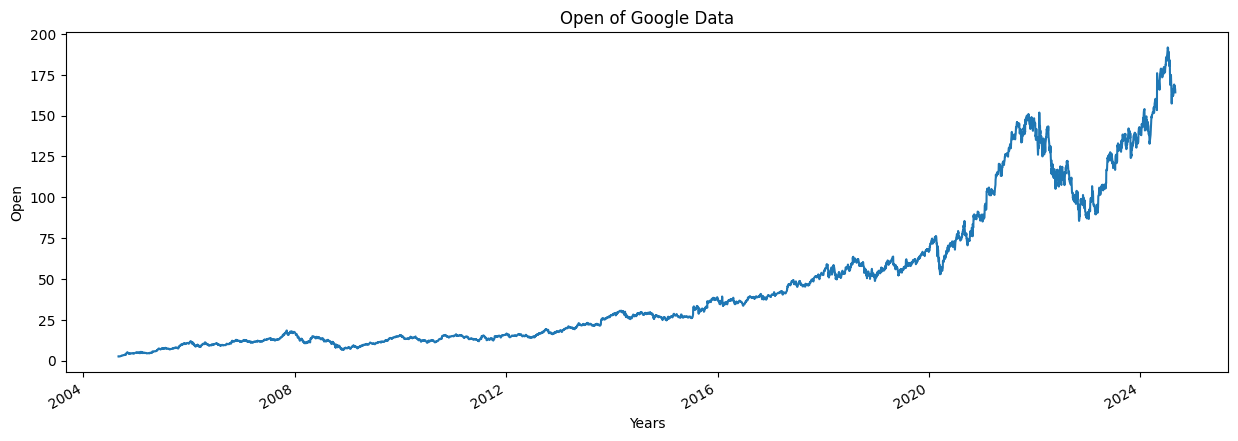

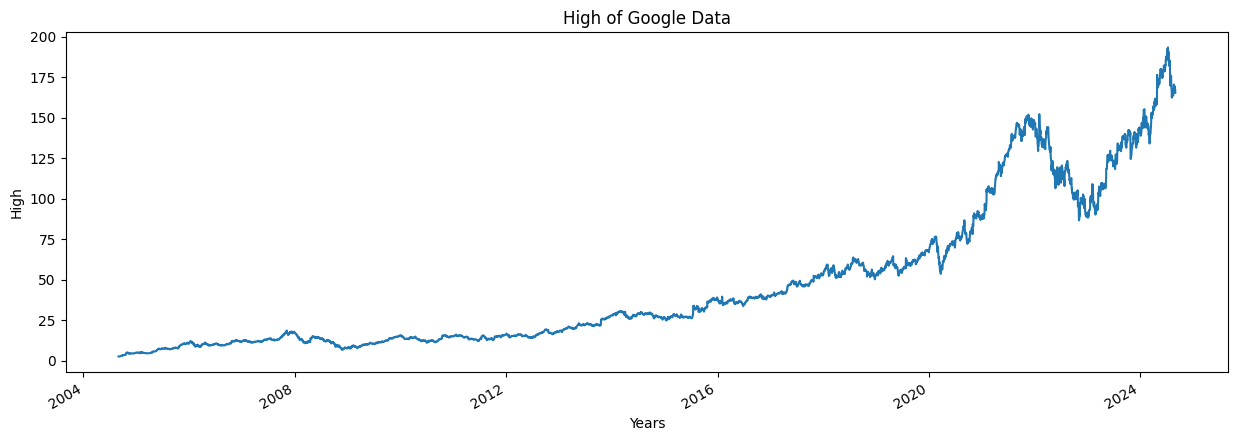

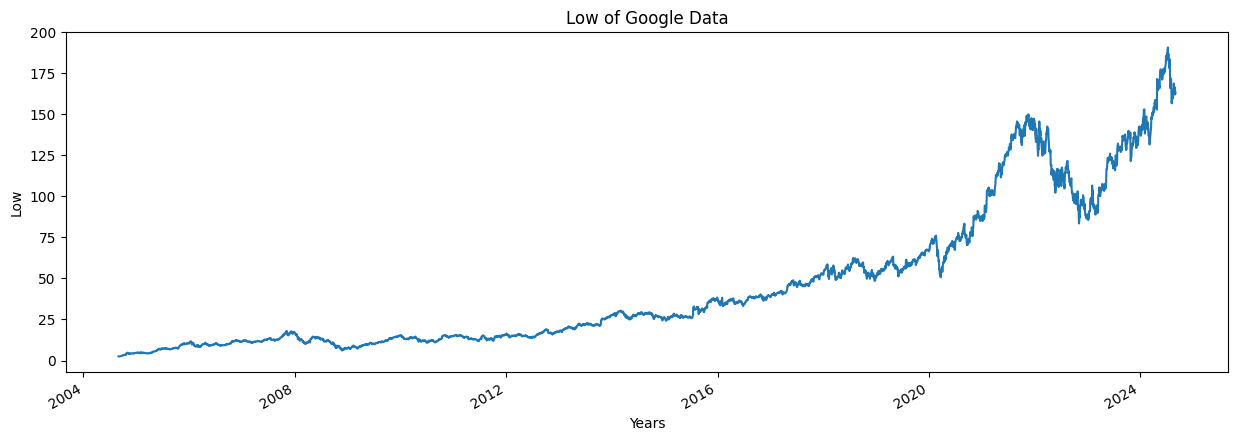

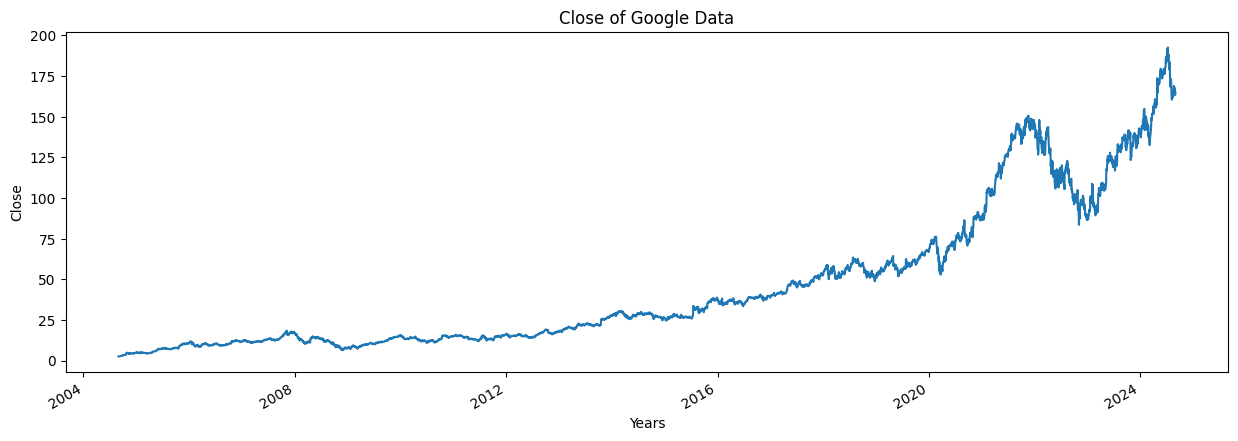

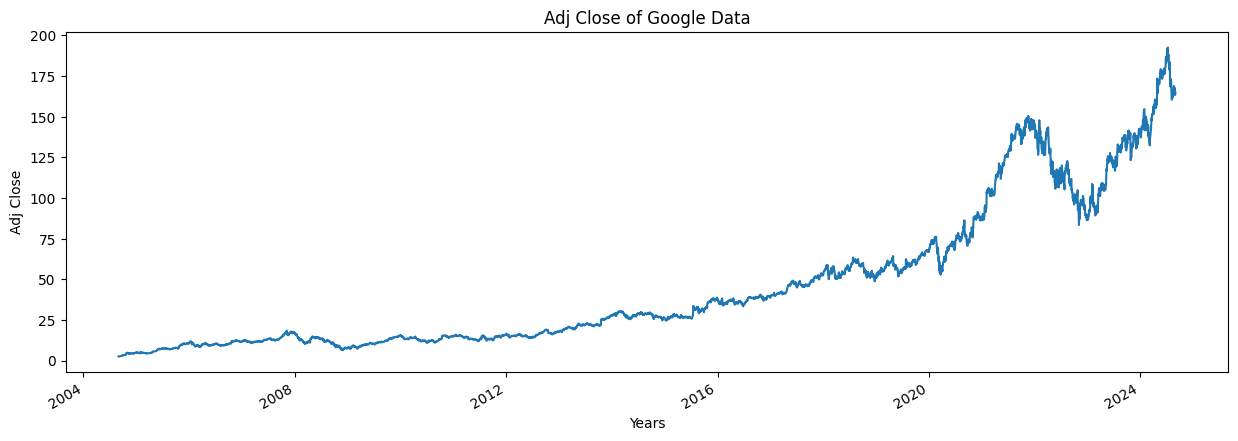

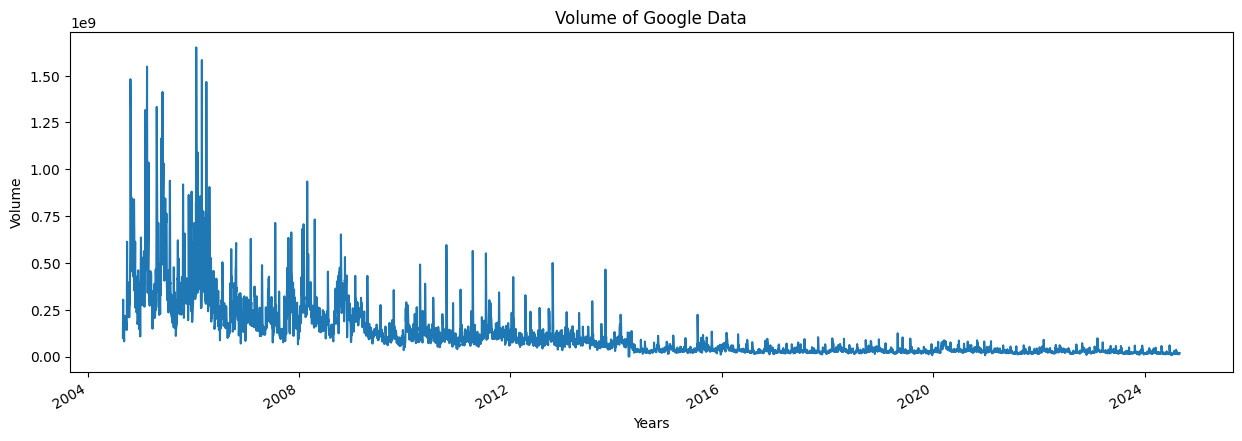

In [ ]:
for column in google_data.columns:
  plot_graph((15,5), google_data[column], column)

we are extracting how many days the stock data is calculated in each year for the past 10 years

In [ ]:
for i in range(2004,2025):
  print(i, list(google_data.index.year).count(i))

2004 86
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 168


calucating the moving avarage of 250 days data

In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-08-19,NaN
2005-08-22,NaN
2005-08-23,NaN
2005-08-24,NaN
2005-08-25,5.168084


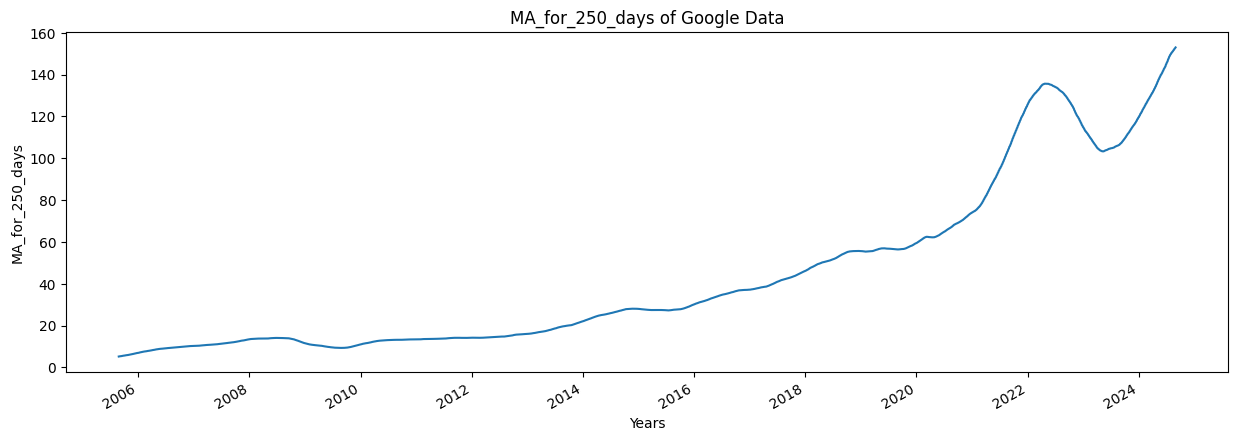

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

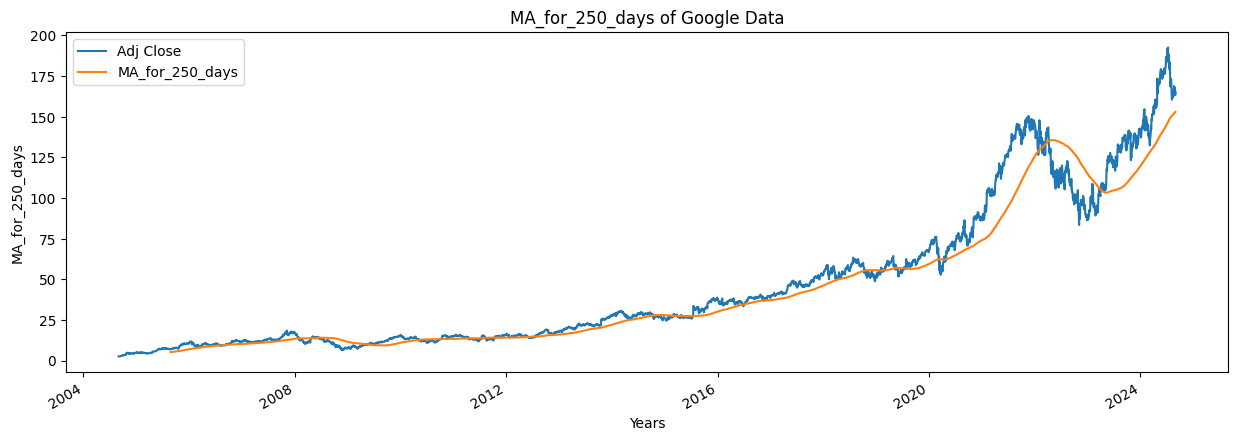

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

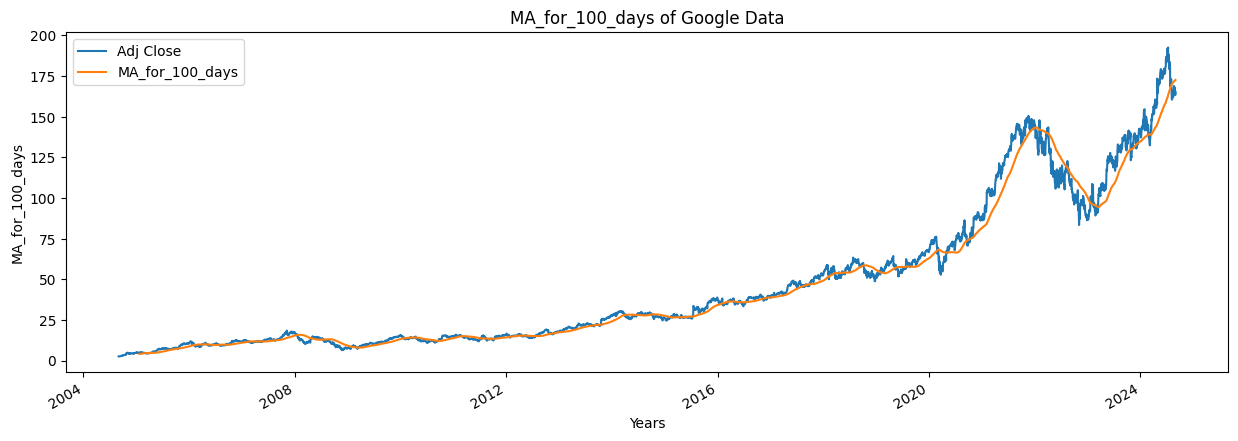

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

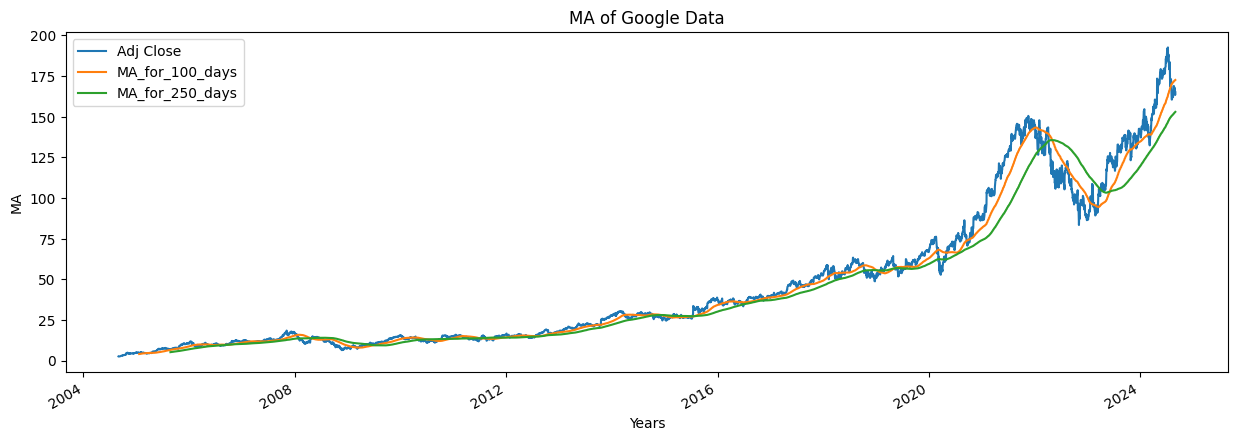

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

calculating the percentage change in google_data

In [ ]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-31,2.546795,NaN
2004-09-01,2.494053,-0.020709
2004-09-02,2.525399,0.012568
2004-09-03,2.488082,-0.014777
2004-09-07,2.527141,0.015699


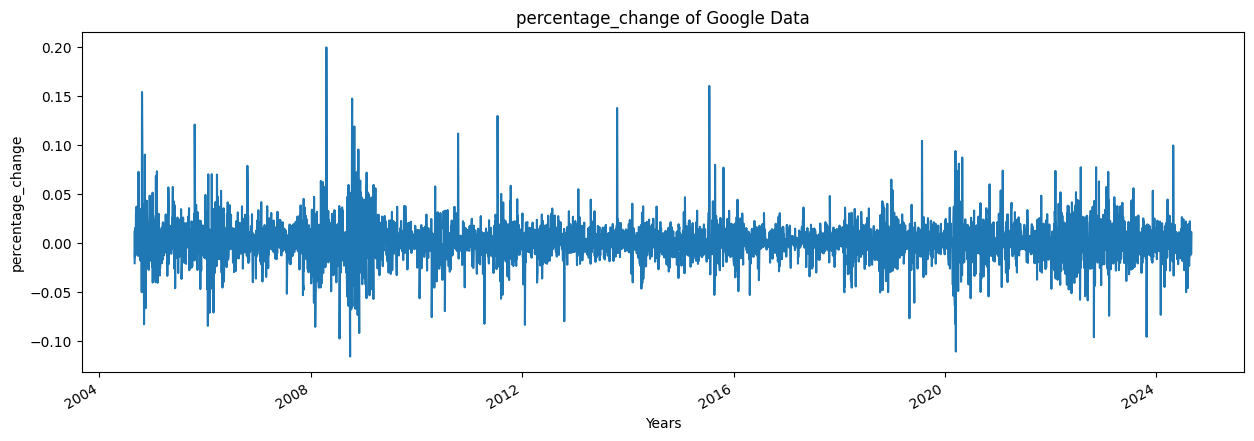

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

Preprocessing the Data

In [ ]:
Adj_close_price = google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[3.08737468e-04],
       [3.13989218e-05],
       [1.96230411e-04],
       ...,
       [8.51923442e-01],
       [8.46139170e-01],
       [8.55131069e-01]])

In [ ]:
len(scaled_data)

5035

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [ ]:
x_data[0],y_data[0]

(array([[3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.34924043e-03],
        [5.49314139e-03],
        [5.76917233e-03],
        [6.42981593e-03],
        [6.27021613e-03],
        [5.29560337e-03],
        [6.45859461e-03],
        [9.47400565e-03],
        [1.1

Splitting data into train and test set

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


Building Netural Network Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs= 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 372s 106ms/step - loss: 1.7869e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 382s 106ms/step - loss: 7.1286e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


In [ ]:
predictions

array([[0.28573528],
       [0.280714  ],
       [0.2813872 ],
       ...,
       [0.8162658 ],
       [0.81128824],
       [0.8062525 ]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.826912],
       [ 55.872005],
       [ 56.00003 ],
       ...,
       [157.71892 ],
       [156.77232 ],
       [155.81467 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.90465927],
       [ 55.44091415],
       [ 54.55042267],
       ...,
       [164.5       ],
       [163.3999939 ],
       [165.11000061]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

4.51912338393671

In [ ]:
import pandas as pd # imports pandas library and assigns it to the alias 'pd'

ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-11,53.904659,56.826912
2018-10-12,55.440914,55.872005
2018-10-15,54.550423,56.000031
2018-10-16,56.000275,55.872540
2018-10-17,55.721092,56.309513


<Figure size 640x480 with 0 Axes>

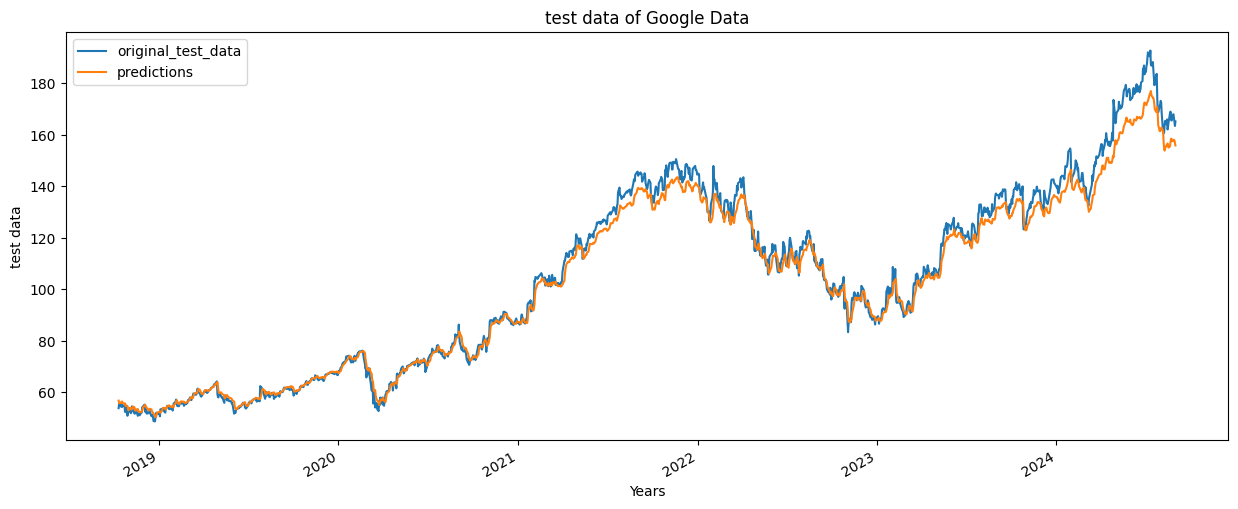

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

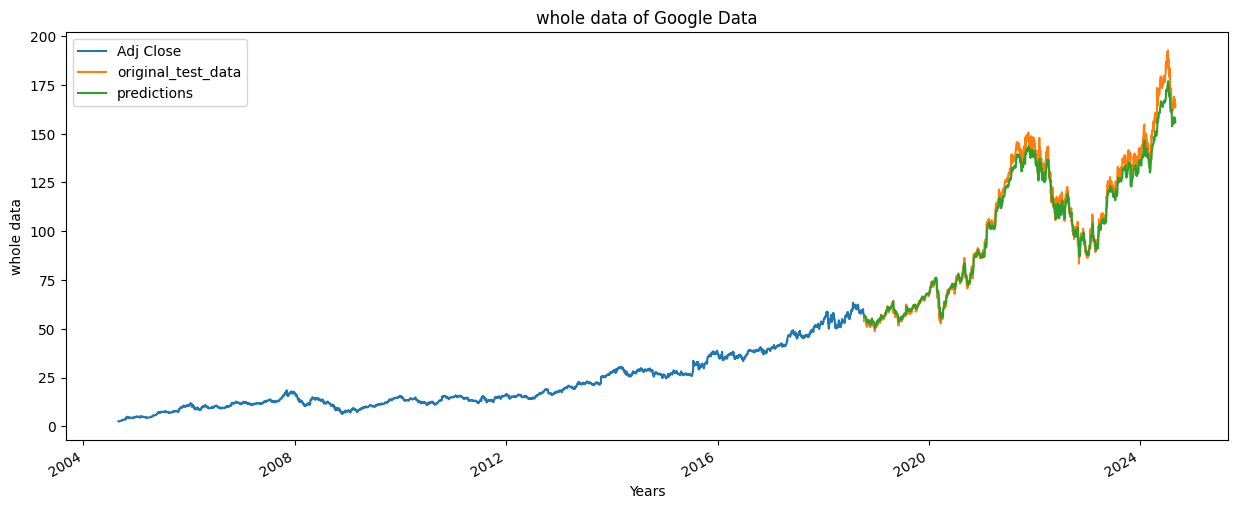

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")